Project 1 : Cotton Plant Disease Prediction

In [24]:
# Import libraries
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#check the version
keras.__version__

'3.4.1'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_data_path = "/content/drive/MyDrive/Datasets/Cotton Disease/train"
validation_data_path = "/content/drive/MyDrive/Datasets/Cotton Disease/val"

Data Augmentation

In [6]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [7]:
#Augmentation for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')


In [8]:
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [9]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [10]:
#Augmentation for validation
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 253 images belonging to 4 classes.


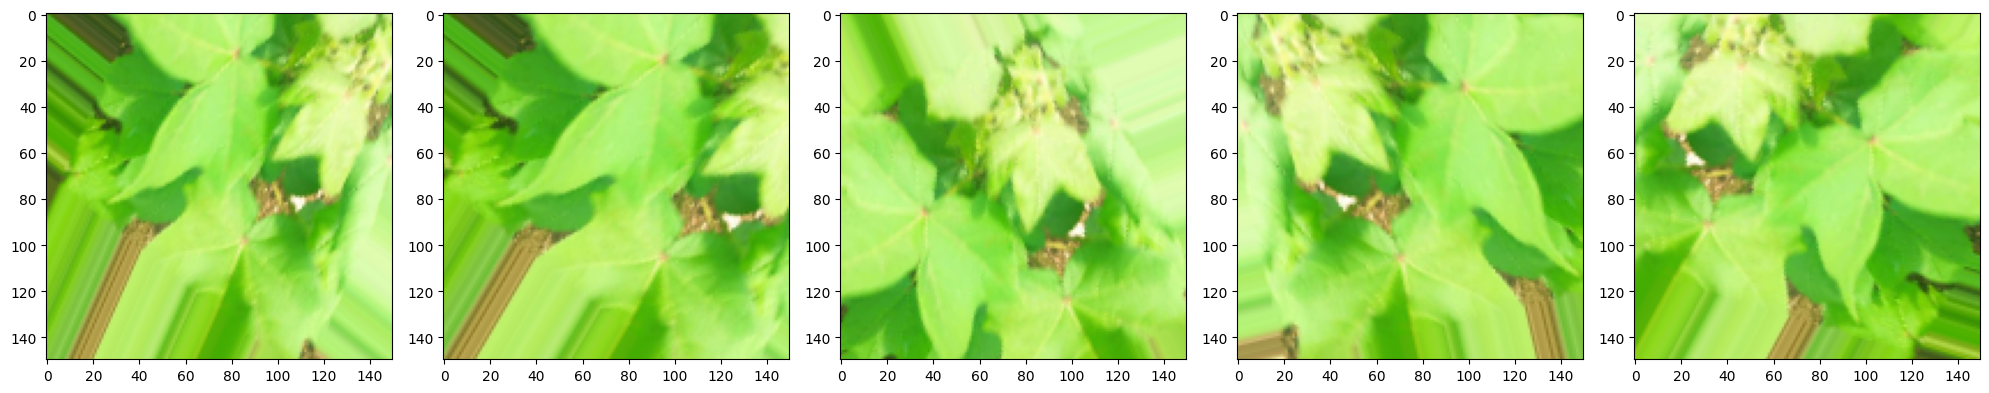

In [11]:
# showing augmented images

images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

Build a cnn model

In [12]:
cnn_model = keras.models.Sequential([
                                    #convloutional and MaxPooling Layer 1 :
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    #convloution and MaxPooling layer 2:
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    #convloution and MaxPooling layer 3:
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    #convloution and MaxPooling layer 4:
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),  #drop the neural 50%
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1), #drop the neural 10%
                                    keras.layers.Dense(units=256, activation='relu'),
                                    keras.layers.Dropout(0.25),   #drop the neural 25%
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# compile cnn model
cnn_model.compile(optimizer = Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [14]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,028,228 (7.74 MB)

 Trainable params: 2,028,228 (7.74 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# train cnn model
train = cnn_model.fit(training_data,
                          epochs=10,
                          verbose=1, #Displays a progress bar for each epoch, showing metrics like loss and accuracy.
                          validation_data= valid_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.3602 - loss: 1.4653 - val_accuracy: 0.5415 - val_loss: 1.0415
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.5121 - loss: 1.1201 - val_accuracy: 0.4704 - val_loss: 1.0457
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6113 - loss: 0.9597 - val_accuracy: 0.7233 - val_loss: 0.7533
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6447 - loss: 0.9018 - val_accuracy: 0.6561 - val_loss: 0.9025
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6652 - loss: 0.8427 - val_accuracy: 0.6561 - val_loss: 0.7081
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.6665 - loss: 0.7974 - val_accuracy: 0.6996 - val_loss: 0.6686
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.6556 - loss: 0.8076 - val_accuracy: 0.7431 - val_loss: 0.6804
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7058 - loss: 0.7186 - val_accuracy: 0.8024 - val_loss: 0.

Visualize the model

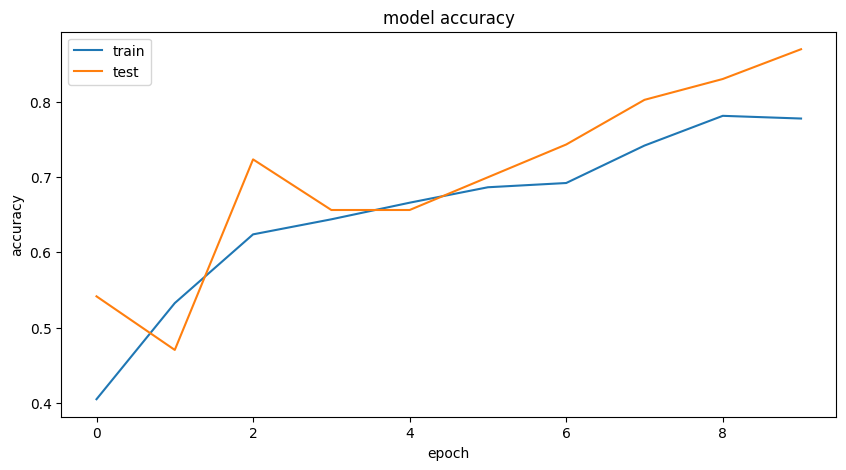

In [16]:
#summarize history for accuracy
plt.figure(figsize = (10,5))
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

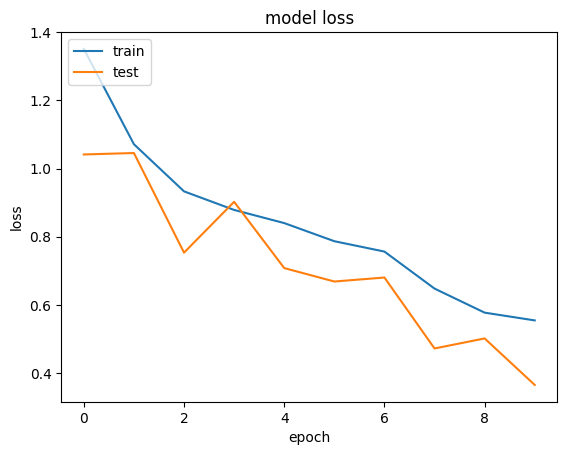

In [17]:
# summarize history for loss
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
train.history

{'accuracy': [0.4049205482006073,
  0.5325474143028259,
  0.6237826943397522,
  0.6437724232673645,
  0.6658124327659607,
  0.6863147020339966,
  0.6919528245925903,
  0.7416709661483765,
  0.7811378836631775,
  0.7775499820709229],
 'loss': [1.3511292934417725,
  1.0715054273605347,
  0.9331514835357666,
  0.8786795139312744,
  0.8401032090187073,
  0.7868936061859131,
  0.7564905881881714,
  0.6479018926620483,
  0.5773003697395325,
  0.5545397996902466],
 'val_accuracy': [0.5415019989013672,
  0.47035571932792664,
  0.7233201861381531,
  0.6561264991760254,
  0.6561264991760254,
  0.6996047496795654,
  0.7430830001831055,
  0.8023715615272522,
  0.8300395011901855,
  0.8695651888847351],
 'val_loss': [1.0414502620697021,
  1.0456680059432983,
  0.7533416748046875,
  0.9025336503982544,
  0.7080726027488708,
  0.6686350703239441,
  0.6803718209266663,
  0.472188264131546,
  0.5016372203826904,
  0.36523106694221497]}

Prediction

In [25]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize the image
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = img_array / 255.0  # Scale pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    return img_array

# Load an unseen image
unseen_image_path = '/content/drive/MyDrive/Datasets/Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg'  # Update with your image path
img_array = load_and_preprocess_image(unseen_image_path)

In [26]:
# Make prediction
predictions = cnn_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [27]:
# Map predicted class to labels
class_indices = training_data.class_indices
class_labels = list(class_indices.keys())  # Get the class labels


In [28]:
# Get the predicted class label
predicted_label = class_labels[predicted_class[0]]
print(f'The predicted class is: {predicted_label}')

The predicted class is: diseased cotton leaf


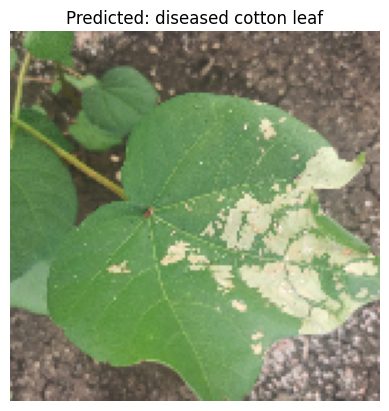

In [29]:
# Display the image and prediction
plt.imshow(image.load_img(unseen_image_path, target_size=(150, 150)))
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()